In [5]:

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import EarlyStopping

from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN
import glob
from datetime import datetime
from keras.layers import Dropout
#import pyemd
%matplotlib inline


Using TensorFlow backend.
C:\Users\kuruparans\AppData\Local\conda\conda\envs\wind\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kuruparans\AppData\Local\conda\conda\envs\wind\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kuruparans\AppData\Local\conda\conda\envs\wind\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

In [63]:
import glob

all_data = pd.DataFrame()
path = 'C:\\Users\\kuruparans\\Documents\\Prof.Suganthan\\Canada_ON&QC_winddata_2017\\ON_*.xlsx'
for f in glob.glob(path):
    df = pd.read_excel(f, sheet_name=None, ignore_index=True, usecols=['windspd','month','day','hour'])
    cdf = pd.concat(df.values())
    all_data = all_data.append(cdf,ignore_index=True)
print(all_data)
dataframe=all_data

       day  hour  month  windspd
0      NaN   NaN    NaN      NaN
1      NaN   NaN    NaN      NaN
2      NaN   NaN    NaN      NaN
3      1.0   0.0    4.0     14.0
4      1.0   1.0    4.0     14.0
...    ...   ...    ...      ...
8791  30.0  19.0    9.0      2.0
8792  30.0  20.0    9.0      4.0
8793  30.0  21.0    9.0      4.0
8794  30.0  22.0    9.0      2.0
8795  30.0  23.0    9.0      1.0

[8796 rows x 4 columns]


In [64]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [65]:
dataframe

,day,hour,month,windspd
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,1.0,0.0,4.0,14.0
4,1.0,1.0,4.0,14.0
5,1.0,2.0,4.0,12.0
6,1.0,3.0,4.0,10.0
7,1.0,4.0,4.0,8.0
8,1.0,5.0,4.0,6.0
9,1.0,6.0,4.0,9.0


In [66]:
dataframe['date_time']=(dataframe['month']-1)*30*24+(dataframe['day']-1) *24 + dataframe['hour']
dataframe=dataframe[['date_time','windspd'] ]
dataframe=dataframe.dropna()

In [67]:
dataframe

,date_time,windspd
3,2160.0,14.0
4,2161.0,14.0
5,2162.0,12.0
6,2163.0,10.0
7,2164.0,8.0
8,2165.0,6.0
9,2166.0,9.0
10,2167.0,12.0
11,2168.0,11.0
12,2169.0,9.0


In [68]:
import PyEMD

In [69]:
from PyEMD import EMD
n = dataframe['windspd'].as_matrix()

s = np.random.random(len(dataframe['windspd']))

emd = EMD()
IMFs = emd(n)

C:\Users\kuruparans\AppData\Local\conda\conda\envs\wind\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [70]:
IMFs

array([[ 2.05393074e+00,  2.05302764e+00,  1.10566777e+00, ...,
         7.21538382e-01, -6.80790040e-01, -5.83425287e-01],
       [ 1.01869810e+00,  1.08041720e+00,  4.47504992e-01, ...,
         2.96235580e+00,  2.90237564e+00,  1.91766724e+00],
       [ 9.53154014e-01,  6.28159488e-01, -1.14448522e-02, ...,
        -4.18978669e+00, -4.29112417e+00, -4.13725887e+00],
       ...,
       [ 1.70867012e+00,  1.71602488e+00,  1.72336186e+00, ...,
        -3.37580555e+00, -3.37255092e+00, -3.36926307e+00],
       [ 8.98427595e-01,  8.99232281e-01,  9.00033010e-01, ...,
        -1.61987305e+00, -1.61960164e+00, -1.61932688e+00],
       [ 1.17746988e+01,  1.17746550e+01,  1.17746111e+01, ...,
         1.07099973e+01,  1.07096393e+01,  1.07092815e+01]])

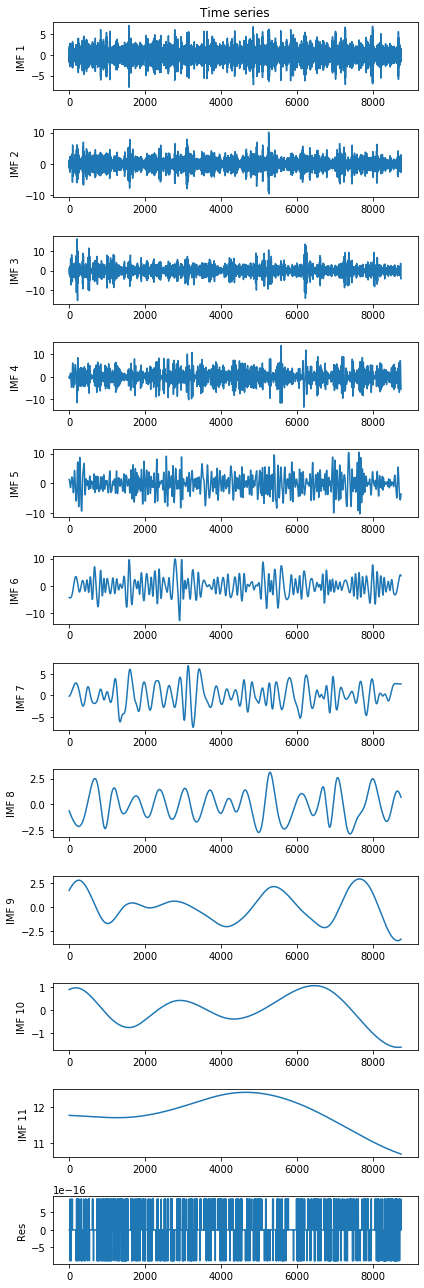

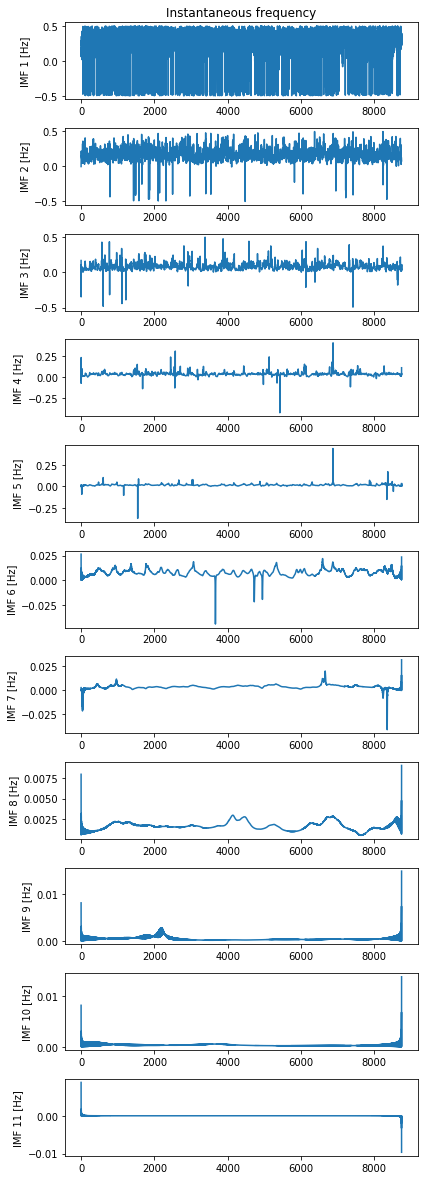

In [71]:
import numpy as np
from PyEMD import EMD, Visualisation

t = np.arange(0, len(dataframe['windspd']), 1)
S = np.sin(13*t + 0.2*t**1.4) - np.cos(3*t)

# Extract imfs and residue
# In case of EMD
emd = EMD()
emd.emd(n)
imfs, res = emd.get_imfs_and_residue()

# In general:
#components = EEMD()(S)
#imfs, res = components[:-1], components[-1]

vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, t=t, include_residue=True)
vis.plot_instant_freq(t, imfs=imfs)
vis.show()

In [80]:
dataframe['windspd']=imfs[5]

In [81]:
''' Dividing data in test and train sets '''
dataset = dataframe.values
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

6558 2186


In [82]:
''' Helper to create time frames with look backs '''
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 1]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 1])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [83]:
''' Creating time frames with look backs '''
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

6534
2162


In [84]:
trainY

array([-4.47702597, -4.47686918, -4.47619033, ..., -0.00899332,
       -0.05659662, -0.10219182])

In [85]:
trainX

array([[-4.36428068, -4.37233118, -4.3801643 , ..., -4.47454768,
        -4.47584729, -4.47667923],
       [-4.37233118, -4.3801643 , -4.38777061, ..., -4.47584729,
        -4.47667923, -4.47702597],
       [-4.3801643 , -4.38777061, -4.39514009, ..., -4.47667923,
        -4.47702597, -4.47686918],
       ...,
       [ 1.17130815,  1.15004545,  1.12368727, ...,  0.14442428,
         0.09166122,  0.04047399],
       [ 1.15004545,  1.12368727,  1.09260345, ...,  0.09166122,
         0.04047399, -0.00899332],
       [ 1.12368727,  1.09260345,  1.05716381, ...,  0.04047399,
        -0.00899332, -0.05659662]])

In [86]:
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [87]:
trainX.shape



(6534, 1, 24)

Train on 6534 samples, validate on 2162 samples
Epoch 1/300
6534/6534 [==============================] - 1s 196us/step - loss: 1.9211 - val_loss: 0.9596
Epoch 2/300
6534/6534 [==============================] - 0s 50us/step - loss: 1.0461 - val_loss: 0.5766
Epoch 3/300
6534/6534 [==============================] - 0s 49us/step - loss: 0.8180 - val_loss: 0.4625
Epoch 4/300
6534/6534 [==============================] - 0s 53us/step - loss: 0.7028 - val_loss: 0.3925
Epoch 5/300
6534/6534 [==============================] - 0s 49us/step - loss: 0.6201 - val_loss: 0.3351
Epoch 6/300
6534/6534 [==============================] - 0s 53us/step - loss: 0.5400 - val_loss: 0.2657
Epoch 7/300
6534/6534 [==============================] - 0s 49us/step - loss: 0.4589 - val_loss: 0.2711
Epoch 8/300
6534/6534 [==============================] - 0s 49us/step - loss: 0.4180 - val_loss: 0.3053
Epoch 9/300
6534/6534 [==============================] - 0s 60us/step - loss: 0.3811 - val_loss: 0.1962
Epoch 10/300
65

6534/6534 [==============================] - 0s 49us/step - loss: 0.1322 - val_loss: 0.1880
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 24)                4704      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 25        
Total params: 4,729
Trainable params: 4,729
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'loss'])


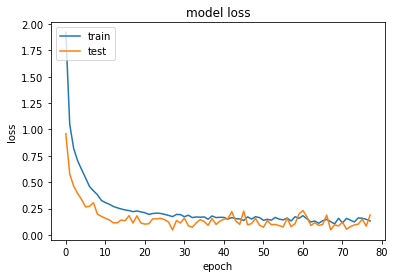

In [88]:
model = Sequential()
model.add(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Root mean squared error Train: 0.383
Root mean squared error Test: 0.237


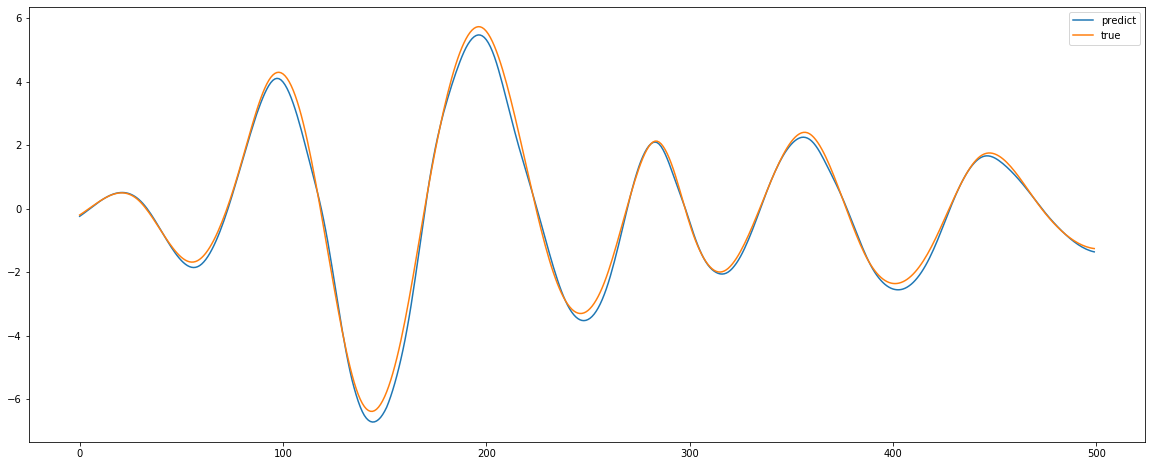

Variance : 0.992
Mean absolute error Train: 0.230
Mean absolute error Test: 0.188


In [89]:
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [90]:
#changing loss funtion to RMSE 

Train on 6534 samples, validate on 2162 samples
Epoch 1/300
6534/6534 [==============================] - 2s 256us/step - loss: 1.7902 - acc: 0.0000e+00 - val_loss: 0.8636 - val_acc: 0.0000e+00
Epoch 2/300
6534/6534 [==============================] - 0s 42us/step - loss: 1.0713 - acc: 0.0000e+00 - val_loss: 0.6327 - val_acc: 0.0000e+00
Epoch 3/300
6534/6534 [==============================] - 0s 46us/step - loss: 0.8807 - acc: 0.0000e+00 - val_loss: 0.5217 - val_acc: 0.0000e+00
Epoch 4/300
6534/6534 [==============================] - 0s 47us/step - loss: 0.7699 - acc: 0.0000e+00 - val_loss: 0.4379 - val_acc: 0.0000e+00
Epoch 5/300
6534/6534 [==============================] - 0s 47us/step - loss: 0.6767 - acc: 0.0000e+00 - val_loss: 0.3763 - val_acc: 0.0000e+00
Epoch 6/300
6534/6534 [==============================] - 0s 49us/step - loss: 0.6025 - acc: 0.0000e+00 - val_loss: 0.3347 - val_acc: 0.0000e+00
Epoch 7/300
6534/6534 [==============================] - 0s 47us/step - loss: 0.5420 - 

6534/6534 [==============================] - 0s 53us/step - loss: 0.1851 - acc: 0.0000e+00 - val_loss: 0.1637 - val_acc: 0.0000e+00
Epoch 58/300
6534/6534 [==============================] - 0s 53us/step - loss: 0.1850 - acc: 0.0000e+00 - val_loss: 0.1292 - val_acc: 0.0000e+00
Epoch 59/300
6534/6534 [==============================] - 0s 51us/step - loss: 0.1770 - acc: 0.0000e+00 - val_loss: 0.1603 - val_acc: 0.0000e+00
Epoch 60/300
6534/6534 [==============================] - 0s 48us/step - loss: 0.1837 - acc: 0.0000e+00 - val_loss: 0.1088 - val_acc: 0.0000e+00
Epoch 61/300
6534/6534 [==============================] - 0s 43us/step - loss: 0.1809 - acc: 0.0000e+00 - val_loss: 0.1385 - val_acc: 0.0000e+00
Epoch 62/300
6534/6534 [==============================] - 0s 44us/step - loss: 0.1785 - acc: 0.0000e+00 - val_loss: 0.1666 - val_acc: 0.0000e+00
Epoch 63/300
6534/6534 [==============================] - 0s 47us/step - loss: 0.1840 - acc: 0.0000e+00 - val_loss: 0.1069 - val_acc: 0.0000e+0

6534/6534 [==============================] - 0s 51us/step - loss: 0.1563 - acc: 0.0000e+00 - val_loss: 0.1164 - val_acc: 0.0000e+00
Epoch 114/300
6534/6534 [==============================] - 0s 48us/step - loss: 0.1615 - acc: 0.0000e+00 - val_loss: 0.0965 - val_acc: 0.0000e+00
Epoch 115/300
6534/6534 [==============================] - 0s 49us/step - loss: 0.1588 - acc: 0.0000e+00 - val_loss: 0.1010 - val_acc: 0.0000e+00
Epoch 116/300
6534/6534 [==============================] - 0s 59us/step - loss: 0.1531 - acc: 0.0000e+00 - val_loss: 0.1068 - val_acc: 0.0000e+00
Epoch 117/300
6534/6534 [==============================] - 0s 54us/step - loss: 0.1560 - acc: 0.0000e+00 - val_loss: 0.1104 - val_acc: 0.0000e+00
Epoch 118/300
6534/6534 [==============================] - 0s 55us/step - loss: 0.1556 - acc: 0.0000e+00 - val_loss: 0.0714 - val_acc: 0.0000e+00
Epoch 119/300
6534/6534 [==============================] - 0s 57us/step - loss: 0.1566 - acc: 0.0000e+00 - val_loss: 0.1070 - val_acc: 0.0

6534/6534 [==============================] - 0s 50us/step - loss: 0.1432 - acc: 0.0000e+00 - val_loss: 0.1058 - val_acc: 0.0000e+00
Epoch 170/300
6534/6534 [==============================] - 0s 48us/step - loss: 0.1411 - acc: 0.0000e+00 - val_loss: 0.1137 - val_acc: 0.0000e+00
Epoch 171/300
6534/6534 [==============================] - 0s 47us/step - loss: 0.1413 - acc: 0.0000e+00 - val_loss: 0.0796 - val_acc: 0.0000e+00
Epoch 172/300
6534/6534 [==============================] - 0s 48us/step - loss: 0.1464 - acc: 0.0000e+00 - val_loss: 0.1077 - val_acc: 0.0000e+00
Epoch 173/300
6534/6534 [==============================] - 0s 46us/step - loss: 0.1446 - acc: 0.0000e+00 - val_loss: 0.1148 - val_acc: 0.0000e+00
Epoch 174/300
6534/6534 [==============================] - 0s 47us/step - loss: 0.1369 - acc: 0.0000e+00 - val_loss: 0.0911 - val_acc: 0.0000e+00
Epoch 175/300
6534/6534 [==============================] - 0s 46us/step - loss: 0.1449 - acc: 0.0000e+00 - val_loss: 0.0854 - val_acc: 0.0

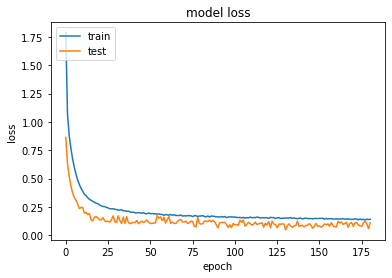

Root mean squared error Train: 0.274
Root mean squared error Test: 0.150


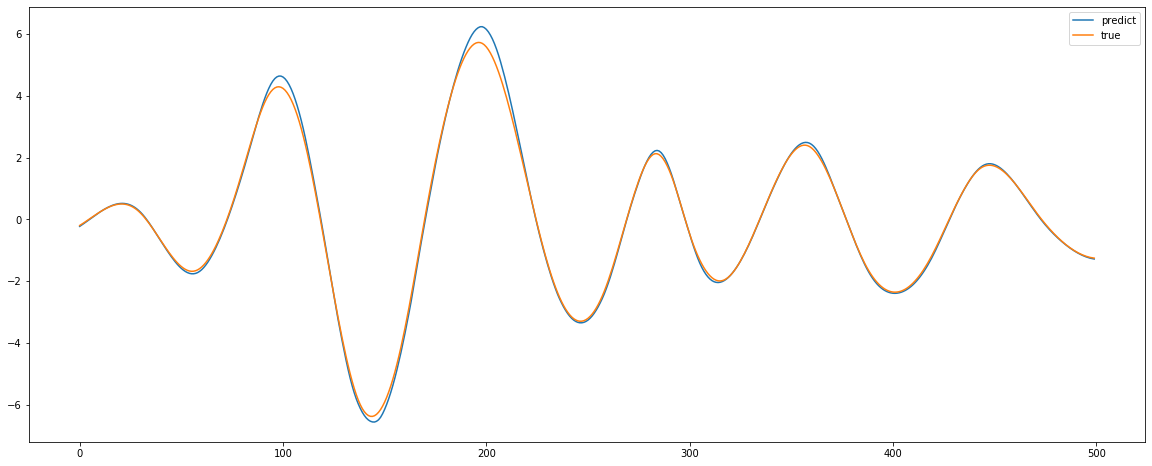

Variance : 0.997
Mean absolute error Train: 0.124
Mean absolute error Test: 0.092


In [91]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model = Sequential()
model.add(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [92]:
#GRU Unit

Train on 6534 samples, validate on 2162 samples
Epoch 1/300
6534/6534 [==============================] - 1s 225us/step - loss: 1.3012 - val_loss: 0.4993
Epoch 2/300
6534/6534 [==============================] - 0s 42us/step - loss: 0.7196 - val_loss: 0.4220
Epoch 3/300
6534/6534 [==============================] - 0s 44us/step - loss: 0.6468 - val_loss: 0.4116
Epoch 4/300
6534/6534 [==============================] - 0s 45us/step - loss: 0.5989 - val_loss: 0.3444
Epoch 5/300
6534/6534 [==============================] - 0s 44us/step - loss: 0.5369 - val_loss: 0.2844
Epoch 6/300
6534/6534 [==============================] - 0s 45us/step - loss: 0.5025 - val_loss: 0.2567
Epoch 7/300
6534/6534 [==============================] - 0s 45us/step - loss: 0.4395 - val_loss: 0.2095
Epoch 8/300
6534/6534 [==============================] - 0s 44us/step - loss: 0.4198 - val_loss: 0.1915
Epoch 9/300
6534/6534 [==============================] - 0s 43us/step - loss: 0.3995 - val_loss: 0.2739
Epoch 10/300
65

6534/6534 [==============================] - 0s 43us/step - loss: 0.1856 - val_loss: 0.1304
Epoch 79/300
6534/6534 [==============================] - 0s 41us/step - loss: 0.1857 - val_loss: 0.0998
Epoch 80/300
6534/6534 [==============================] - 0s 44us/step - loss: 0.1844 - val_loss: 0.0964
Epoch 81/300
6534/6534 [==============================] - 0s 46us/step - loss: 0.1771 - val_loss: 0.0782
Epoch 82/300
6534/6534 [==============================] - 0s 41us/step - loss: 0.1874 - val_loss: 0.2810
Epoch 83/300
6534/6534 [==============================] - 0s 39us/step - loss: 0.1993 - val_loss: 0.1730
Epoch 84/300
6534/6534 [==============================] - 0s 48us/step - loss: 0.2069 - val_loss: 0.0681
Epoch 85/300
6534/6534 [==============================] - 0s 47us/step - loss: 0.1649 - val_loss: 0.0914
Epoch 86/300
6534/6534 [==============================] - 0s 44us/step - loss: 0.1816 - val_loss: 0.0951
Epoch 87/300
6534/6534 [==============================] - 0s 56us/st

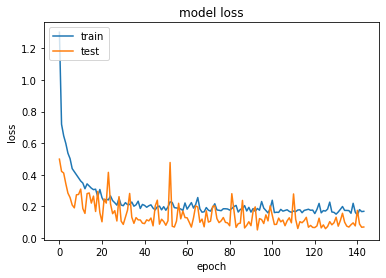

In [93]:
model = Sequential()
model.add(GRU(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Root mean squared error Train: 0.290
Root mean squared error Test: 0.094


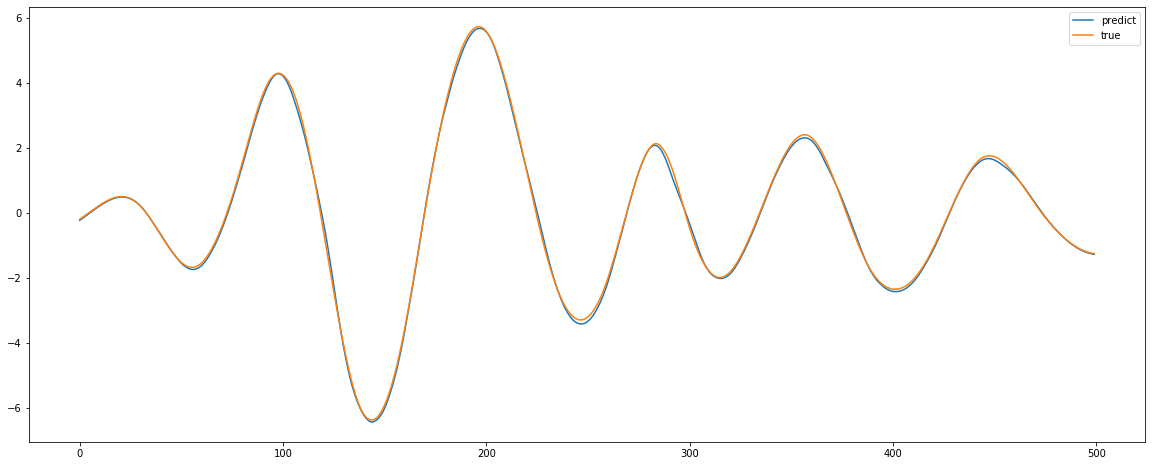

Variance : 0.999
Mean absolute error Train: 0.109
Mean absolute error Test: 0.070


In [94]:
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))


Train on 6534 samples, validate on 2162 samples
Epoch 1/300
6534/6534 [==============================] - 2s 259us/step - loss: 1.3428 - acc: 0.0000e+00 - val_loss: 0.5962 - val_acc: 0.0000e+00
Epoch 2/300
6534/6534 [==============================] - 0s 37us/step - loss: 0.8281 - acc: 0.0000e+00 - val_loss: 0.5355 - val_acc: 0.0000e+00
Epoch 3/300
6534/6534 [==============================] - 0s 38us/step - loss: 0.7291 - acc: 0.0000e+00 - val_loss: 0.4869 - val_acc: 0.0000e+00
Epoch 4/300
6534/6534 [==============================] - 0s 41us/step - loss: 0.6562 - acc: 0.0000e+00 - val_loss: 0.4275 - val_acc: 0.0000e+00
Epoch 5/300
6534/6534 [==============================] - 0s 40us/step - loss: 0.5995 - acc: 0.0000e+00 - val_loss: 0.3740 - val_acc: 0.0000e+00
Epoch 6/300
6534/6534 [==============================] - 0s 36us/step - loss: 0.5505 - acc: 0.0000e+00 - val_loss: 0.3385 - val_acc: 0.0000e+00
Epoch 7/300
6534/6534 [==============================] - 0s 38us/step - loss: 0.5095 - 

6534/6534 [==============================] - 0s 43us/step - loss: 0.2828 - acc: 0.0000e+00 - val_loss: 0.1022 - val_acc: 0.0000e+00
Epoch 58/300
6534/6534 [==============================] - 0s 41us/step - loss: 0.2754 - acc: 0.0000e+00 - val_loss: 0.1260 - val_acc: 0.0000e+00
Epoch 59/300
6534/6534 [==============================] - 0s 42us/step - loss: 0.2808 - acc: 0.0000e+00 - val_loss: 0.1519 - val_acc: 0.0000e+00
Epoch 60/300
6534/6534 [==============================] - 0s 39us/step - loss: 0.2869 - acc: 0.0000e+00 - val_loss: 0.1415 - val_acc: 0.0000e+00
Epoch 61/300
6534/6534 [==============================] - 0s 39us/step - loss: 0.2767 - acc: 0.0000e+00 - val_loss: 0.1317 - val_acc: 0.0000e+00
Epoch 62/300
6534/6534 [==============================] - 0s 42us/step - loss: 0.2693 - acc: 0.0000e+00 - val_loss: 0.1460 - val_acc: 0.0000e+00
Epoch 63/300
6534/6534 [==============================] - 0s 38us/step - loss: 0.2837 - acc: 0.0000e+00 - val_loss: 0.1172 - val_acc: 0.0000e+0

6534/6534 [==============================] - 1s 103us/step - loss: 0.2539 - acc: 0.0000e+00 - val_loss: 0.1250 - val_acc: 0.0000e+00
Epoch 114/300
6534/6534 [==============================] - 1s 100us/step - loss: 0.2628 - acc: 0.0000e+00 - val_loss: 0.1146 - val_acc: 0.0000e+00
Epoch 115/300
6534/6534 [==============================] - 0s 64us/step - loss: 0.2504 - acc: 0.0000e+00 - val_loss: 0.1109 - val_acc: 0.0000e+00
Epoch 116/300
6534/6534 [==============================] - 0s 60us/step - loss: 0.2493 - acc: 0.0000e+00 - val_loss: 0.1251 - val_acc: 0.0000e+00
Epoch 117/300
6534/6534 [==============================] - 1s 88us/step - loss: 0.2584 - acc: 0.0000e+00 - val_loss: 0.1278 - val_acc: 0.0000e+00
Epoch 118/300
6534/6534 [==============================] - 1s 78us/step - loss: 0.2491 - acc: 0.0000e+00 - val_loss: 0.1429 - val_acc: 0.0000e+00
Epoch 119/300
6534/6534 [==============================] - 0s 73us/step - loss: 0.2462 - acc: 0.0000e+00 - val_loss: 0.1172 - val_acc: 0

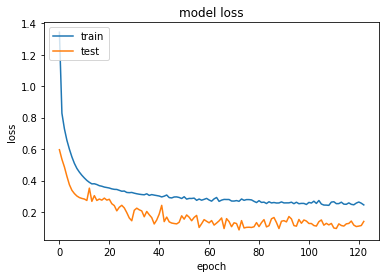

In [95]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model = Sequential()
model.add(GRU(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Root mean squared error Train: 0.374
Root mean squared error Test: 0.172


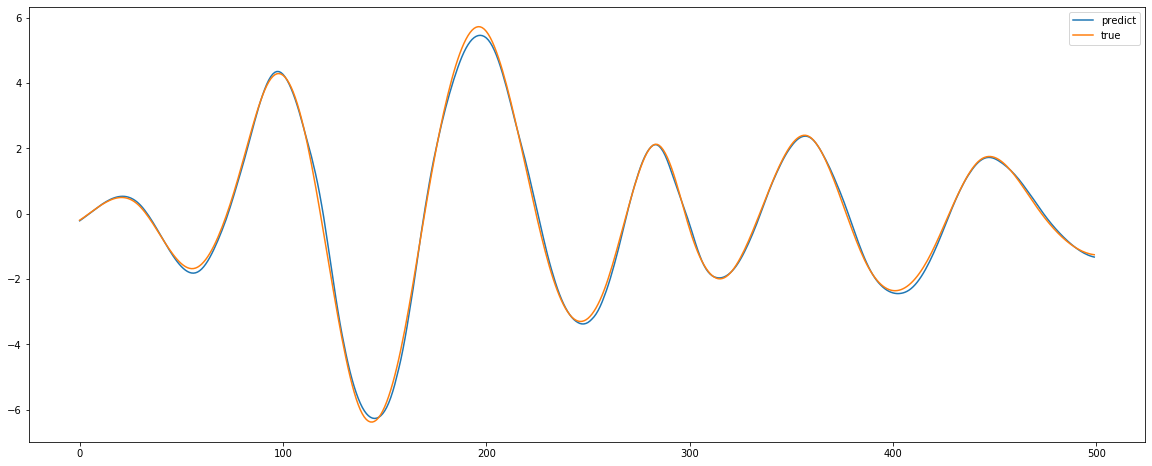

Variance : 0.996
Mean absolute error Train: 0.189
Mean absolute error Test: 0.121


In [96]:
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [97]:
#Simple RNN Unit

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 24)                1176      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 25        
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'loss'])


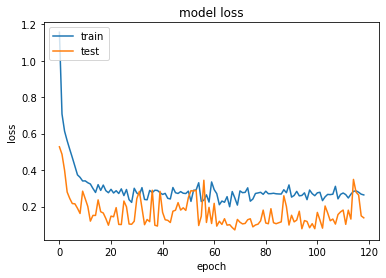

Root mean squared error Train: 0.479
Root mean squared error Test: 0.215


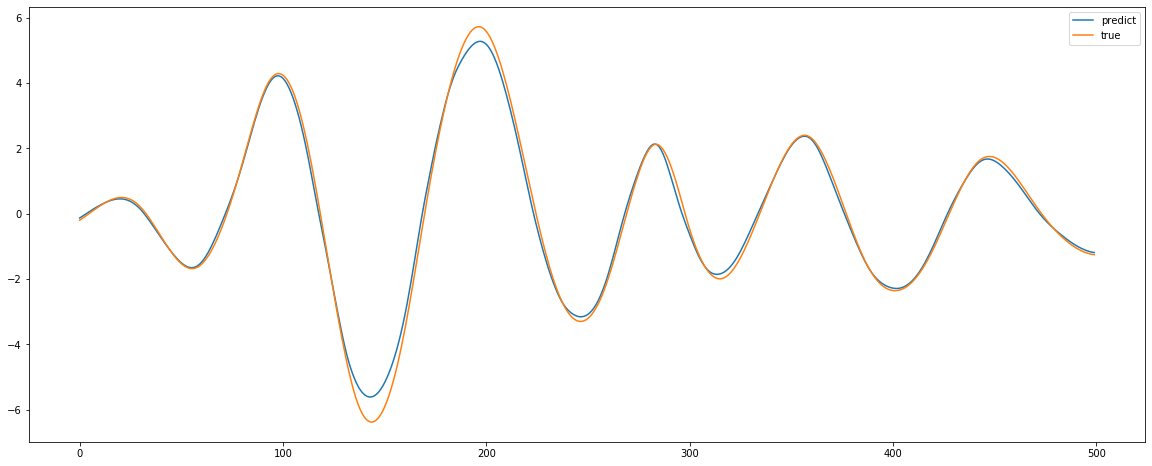

Variance : 0.994
Mean absolute error Train: 0.201
Mean absolute error Test: 0.138


In [98]:
model = Sequential()
model.add(SimpleRNN(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 24)                1176      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


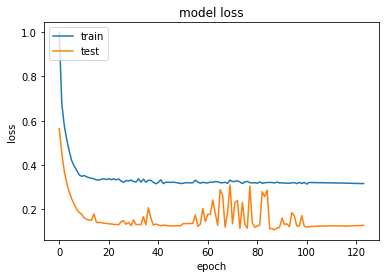

Root mean squared error Train: 0.456
Root mean squared error Test: 0.166


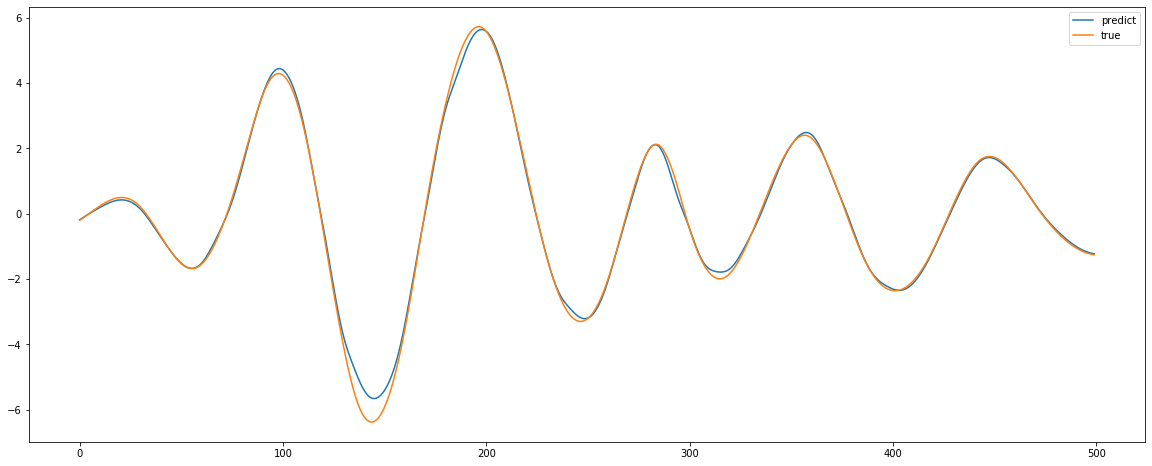

Variance : 0.996
Mean absolute error Train: 0.185
Mean absolute error Test: 0.108


In [101]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model = Sequential()
model.add(SimpleRNN(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))